In [115]:
# Load in the train and test datasets
import pandas as pd
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
titanic = pd.concat([train,test])

In [116]:
titanic = titanic.drop(['Name','Ticket',"Cabin","Survived","PassengerId"], axis=1)



titanic["Embarked"] = titanic["Embarked"].fillna("C")
Embarked = pd.get_dummies(titanic['Embarked'],prefix='Embarked')
titanic = pd.concat([titanic,Embarked],axis=1)
titanic = titanic.drop(["Embarked"], axis=1)


In [117]:
titanic["Fare"]=titanic["Fare"].fillna(train["Fare"].median())
'''
titanic["Fare"].loc[(titanic["Fare"] >= 0) & (titanic["Fare"] <20)] = 1
titanic["Fare"].loc[(titanic["Fare"] >= 20) & (titanic["Fare"] <40)] =2
titanic["Fare"].loc[(titanic["Fare"] >= 40) & (titanic["Fare"] <60)] =3
titanic["Fare"].loc[(titanic["Fare"] >= 60) & (titanic["Fare"] <80)] =4
titanic["Fare"].loc[(titanic["Fare"] >= 80) & (titanic["Fare"] <100)] =5
titanic["Fare"].loc[titanic["Fare"] >= 100] =6
'''
'''
Fare = pd.get_dummies(titanic["Fare"],prefix="Fare")
titanic = pd.concat([titanic,Fare],axis=1)
titanic = titanic.drop(["Fare"], axis=1)
'''


'\nFare = pd.get_dummies(titanic["Fare"],prefix="Fare")\ntitanic = pd.concat([titanic,Fare],axis=1)\ntitanic = titanic.drop(["Fare"], axis=1)\n'

In [118]:
###
titanic["Age"]=titanic["Age"].fillna(train["Age"].median())


'''
titanic["Age"].loc[(titanic["Age"] > 0) & (titanic["Age"] <5)] = 1
titanic["Age"].loc[(titanic["Age"] >= 5) & (titanic["Age"] <10)] = 2
titanic["Age"].loc[(titanic["Age"] >= 10) & (titanic["Age"] <15)] = 3
titanic["Age"].loc[(titanic["Age"] >= 15) & (titanic["Age"] <20)] = 4
titanic["Age"].loc[(titanic["Age"] >= 20) & (titanic["Age"] <25)] =5
titanic["Age"].loc[(titanic["Age"] >= 25) & (titanic["Age"] <30)] =6
titanic["Age"].loc[(titanic["Age"] >= 30) & (titanic["Age"] <35)] =7
titanic["Age"].loc[(titanic["Age"] >= 35) & (titanic["Age"] <40)] =7
titanic["Age"].loc[(titanic["Age"] >= 40) & (titanic["Age"] <50)] =8
titanic["Age"].loc[titanic["Age"] >= 50] =9
'''

'''
train_rf["Age"].loc[(train_rf["Age"] > 0) & (train_rf["Age"] <17)] = 1
train_rf["Age"].loc[(train_rf["Age"] >= 17) & (train_rf["Age"] <30)] =20
train_rf["Age"].loc[(train_rf["Age"] >= 40) & (train_rf["Age"] <50)] =10
train_rf["Age"].loc[train_rf["Age"] >= 50] =4

'''
'''
Age = pd.get_dummies(titanic["Age"],prefix="Age")
titanic = pd.concat([titanic,Age],axis=1)
titanic = titanic.drop(["Age"], axis=1)
'''

'\nAge = pd.get_dummies(titanic["Age"],prefix="Age")\ntitanic = pd.concat([titanic,Age],axis=1)\ntitanic = titanic.drop(["Age"], axis=1)\n'

In [119]:
titanic['Family'] =  titanic["Parch"] + titanic["SibSp"]


titanic['Family'].loc[titanic['Family'] > 0] = 1
titanic['Family'].loc[titanic['Family'] == 0] = 0


titanic = titanic.drop(['SibSp','Parch'], axis=1)


titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

Pclass = pd.get_dummies(titanic["Pclass"],prefix="Pclass")
titanic = pd.concat([titanic,Pclass],axis=1)
titanic = titanic.drop(["Pclass"], axis=1)

C:\Users\ferra\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [126]:
# define training and testing sets

#titanic=pd.concat([titanic['Sex'],Pclass,titanic['Age']],axis=1)

Y = train["Survived"]
X = titanic[:train.shape[0]]

test_rf = titanic[train.shape[0]:]

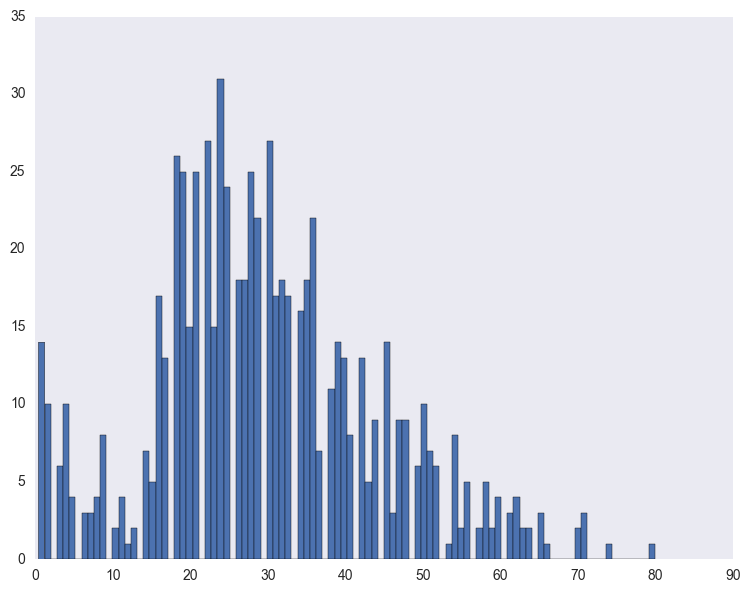

In [121]:
train["Age"].hist(bins=100,figsize=(9,7),grid=False)

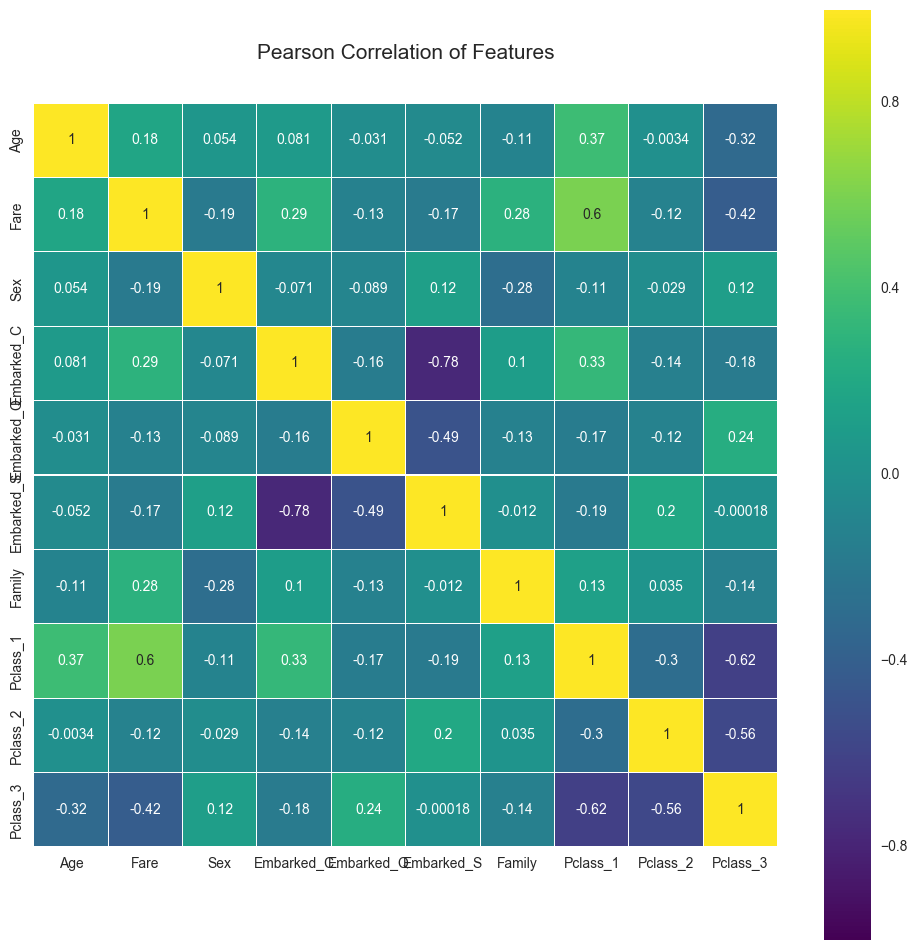

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
seed=5
# Initialize a Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators = 1000,oob_score=True,random_state=seed,criterion='entropy', max_depth=None,min_samples_leaf=2) 
lr = LogisticRegression(random_state=seed) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = clf.fit( X, Y )
forest2 = lr.fit( X, Y )
print("random forest:")
print(clf.score(X, Y))
print(clf.oob_score_)
print("logistic:")
print(lr.score(X, Y))

random forest:
0.914702581369
0.820426487093
logistic:
0.794612794613


In [128]:
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

kf = KFold(train.shape[0], n_folds=5, random_state=1)
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=2)

prediction = cross_validation.cross_val_predict(clf, X,Y,cv=kf)
predictions = pd.Series(prediction)
scores = cross_val_score(clf, X, Y,scoring='f1', cv=kf)
scores2 = cross_val_score(lr, X, Y,scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print("random forest")
print(scores.mean())
print("logistic:")
print(scores2.mean())

random forest
0.752915795507
logistic:
0.714305813526


In [13]:
import sklearn
sklearn.__version__

'0.18.1'

In [82]:
from sklearn import metrics
predicted = clf.predict(X_test)
expected=Y_test
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

 

             precision    recall  f1-score   support

          0       0.81      0.85      0.83        54
          1       0.76      0.69      0.72        36

avg / total       0.79      0.79      0.79        90

[[46  8]
 [11 25]]


In [125]:
predicted = clf.predict(test_rf)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predicted
    })
submission.to_csv('titanic.csv', index=False)

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 5 

In [44]:
sample_leaf_options = [1,5,10,50,100,200,500]
from sklearn.metrics import roc_auc_score

for leaf_size in sample_leaf_options :
    model = RandomForestClassifier(n_estimators= 200, oob_score =True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = leaf_size)

model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=500,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=50,
            verbose=0, warm_start=False)

In [45]:
roc_auc_score(Y,model.oob_prediction)

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_prediction'

In [1]:
import sklearn
sklearn.__version__

'0.18.1'